0. An end-to-end Sikit Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all togrther!


In [144]:
import numpy as np
import pandas as pd

heart_disease = pd.read_csv('../matplotlib/heart-disease.csv')
heart_disease.tail()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [145]:
X = heart_disease.drop('target', axis=1)

y = heart_disease['target']

X.head(), y.head()


(   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   63    1   3       145   233    1        0      150      0      2.3      0   
 1   37    1   2       130   250    0        1      187      0      3.5      0   
 2   41    0   1       130   204    0        0      172      0      1.4      2   
 3   56    1   1       120   236    0        1      178      0      0.8      2   
 4   57    0   0       120   354    0        1      163      1      0.6      2   
 
    ca  thal  
 0   0     1  
 1   0     2  
 2   0     2  
 3   0     2  
 4   0     2  ,
 0    1
 1    1
 2    1
 3    1
 4    1
 Name: target, dtype: int64)

In [146]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50)
clf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [147]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [148]:
len(X_train), len(X_test)


(242, 61)

In [149]:
clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=50)

In [150]:
y_preds = clf.predict(X_test)


In [151]:
y_preds


array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0])

In [152]:
y_test


34     1
216    0
32     1
22     1
168    0
      ..
104    1
172    0
297    0
5      1
249    0
Name: target, Length: 61, dtype: int64

In [153]:
clf.score(X_train, y_train)


1.0

In [154]:
clf.score(X_test, y_test)


0.819672131147541

In [155]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [156]:
print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

           0       0.81      0.79      0.80        28
           1       0.82      0.85      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [157]:
confusion_matrix(y_test, y_preds)


array([[22,  6],
       [ 5, 28]])

In [158]:
accuracy_score(y_test, y_preds)


0.819672131147541

In [159]:
np.random.seed(42)

for i in range(10, 100, 10):
    print(f"tryin model with {i} estimators")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"model accuracy on test set: {clf.score(X_test, y_test) * 100}")
    print(" ")


tryin model with 10 estimators
model accuracy on test set: 77.04918032786885
 
tryin model with 20 estimators
model accuracy on test set: 81.9672131147541
 
tryin model with 30 estimators
model accuracy on test set: 77.04918032786885
 
tryin model with 40 estimators
model accuracy on test set: 81.9672131147541
 
tryin model with 50 estimators
model accuracy on test set: 85.24590163934425
 
tryin model with 60 estimators
model accuracy on test set: 80.32786885245902
 
tryin model with 70 estimators
model accuracy on test set: 80.32786885245902
 
tryin model with 80 estimators
model accuracy on test set: 81.9672131147541
 
tryin model with 90 estimators
model accuracy on test set: 81.9672131147541
 


In [160]:
import pickle

pickle.dump(clf, open('random_forest_model_1.pkl', 'wb'))


In [161]:
loaded_model = pickle.load(open('random_forest_model_1.pkl', 'rb'))
loaded_model.score(X_test, y_test)


0.819672131147541

In [162]:
df = pd.DataFrame(y_test)
df


,target
34,1
216,0
32,1
22,1
168,0
...,...
104,1
172,0
297,0
5,1


In [163]:
import pandas as pd


In [164]:
car_sales_extend = pd.read_csv('car-sales-extended.csv')
car_sales_extend.head()


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [165]:
X = car_sales_extend.drop('Price', axis=1)
y = car_sales_extend['Price']

X.head(), y.head()


(     Make Colour  Odometer (KM)  Doors
 0   Honda  White          35431      4
 1     BMW   Blue         192714      5
 2   Honda  White          84714      4
 3  Toyota  White         154365      4
 4  Nissan   Blue         181577      3,
 0    15323
 1    19943
 2    28343
 3    13434
 4    14043
 Name: Price, dtype: int64)

In [166]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [167]:
model = RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [168]:
# model.fit(X_train, y_train)


In [169]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [170]:
categorical_feature = ['Make', 'Colour', 'Doors']
onehot = OneHotEncoder()

transformer = ColumnTransformer(
    [('onehot', onehot, categorical_feature)], remainder='passthrough')

transformed_X = transformer.fit_transform(X)
transformed_X


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [171]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(
    transformed_X, y, test_size=0.2)
model.fit(X_train, y_train)


RandomForestRegressor()

In [172]:
model.score(X_test, y_test)


0.3235867221569877

In [173]:
df = pd.DataFrame(transformed_X)
df


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [174]:
df1 = pd.get_dummies(car_sales_extend[['Make', 'Colour', 'Doors']])
df1


,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [175]:
car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing.isna().sum()


Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [176]:
car_sales_missing['Make'].fillna('missing', inplace=True)
car_sales_missing['Colour'].fillna('missing', inplace=True)
car_sales_missing['Odometer (KM)'].fillna(
    car_sales_missing['Odometer (KM)'].mean(), inplace=True)


In [177]:
car_sales_missing['Doors'].value_counts()


4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [178]:
car_sales_missing['Doors'].fillna(4, inplace=True)


In [179]:
car_sales_missing.dropna(inplace=True)


In [180]:
car_sales_missing.isna().sum()


Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [181]:
len(car_sales_missing)


950

In [182]:
X = car_sales_extend.drop('Price', axis=1)
y = car_sales_extend['Price']

X.head(), y.head()


(     Make Colour  Odometer (KM)  Doors
 0   Honda  White          35431      4
 1     BMW   Blue         192714      5
 2   Honda  White          84714      4
 3  Toyota  White         154365      4
 4  Nissan   Blue         181577      3,
 0    15323
 1    19943
 2    28343
 3    13434
 4    14043
 Name: Price, dtype: int64)

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X_train, X_test, y_train, y_test = train_test_split(X, y)

categorical_feature = ['Make', 'Colour', 'Doors']
onehot = OneHotEncoder()

transformer = ColumnTransformer(
    [('onehot', onehot, categorical_feature)], remainder='passthrough')

transformed_X = transformer.fit_transform(X)
transformed_X


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [184]:
car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing.head()


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [185]:
car_sales_missing.isna().sum()


Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [186]:
car_sales_missing.dropna(subset=['Price'], inplace=True)


In [187]:
car_sales_missing.isna().sum()


Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [188]:
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']


In [189]:
X.head(), y.head()


(     Make Colour  Odometer (KM)  Doors
 0   Honda  White        35431.0    4.0
 1     BMW   Blue       192714.0    5.0
 2   Honda  White        84714.0    4.0
 3  Toyota  White       154365.0    4.0
 4  Nissan   Blue       181577.0    3.0,
 0    15323.0
 1    19943.0
 2    28343.0
 3    13434.0
 4    14043.0
 Name: Price, dtype: float64)

In [190]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# define columns
cat_features = ['Make', 'Colour']
door_fetures = ['Doors']
num_features = ['Odometer (KM)']

# create an imputer
imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features),
    ('door_imputer', door_imputer, door_fetures),
    ('num_imputer', num_imputer, num_features),
])

transformed_X = imputer.fit_transform(X)
transformed_X


array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [191]:
car_sales_filled = pd.DataFrame(
    transformed_X, columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])
car_sales_filled.isna().sum()


Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [192]:
from sklearn.preprocessing import OneHotEncoder

categorical_feature = ['Make', 'Colour', 'Doors']
onehot = OneHotEncoder()

transformer = ColumnTransformer(
    [('onehot', onehot, categorical_feature)], remainder='passthrough')

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X


<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [193]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(
    transformed_X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)

model.fit(X_train, y_train)

model.score(X_test, y_test)


0.21990196728583944

In [194]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [195]:
import pandas as pd

housing_df = pd.DataFrame(housing['data'], columns=housing['feature_names'])
housing_df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [196]:
housing_df['target'] = housing['target']
housing_df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [197]:
# make data
X = housing_df.drop('target', axis=1)
y = housing_df['target']

X.head(), y.head()


(   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 
    Longitude  
 0    -122.23  
 1    -122.22  
 2    -122.24  
 3    -122.25  
 4    -122.25  ,
 0    4.526
 1    3.585
 2    3.521
 3    3.413
 4    3.422
 Name: target, dtype: float64)

In [198]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = Ridge()
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.575854961144012

In [199]:
from sklearn.svm import SVR

np.random.seed(42)

model = SVR()
model.fit(X_train, y_train)
model.score(X_test, y_test)


-0.016485360107173497

In [200]:
from sklearn.linear_model import Lasso

np.random.seed(42)

model = Lasso()

model.fit(X_train, y_train)
model.score(X_test, y_test)


0.28416718210083947

In [201]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
np.random.seed(42)

model = BaggingRegressor(KNeighborsRegressor(),
                         max_samples=0.5, max_features=0.5)

model.fit(X_train, y_train)
model.score(X_test, y_test)


0.39608918519872716

In [202]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

model = RandomForestRegressor(n_estimators=100)

model.fit(X_train, y_train)
model.score(X_test, y_test)


0.8051230593157366

In [203]:
y_preds = model.predict(X_test)
y_preds[:10]


array([0.5095   , 0.74161  , 4.9232571, 2.52961  , 2.27369  , 1.64692  ,
       2.37605  , 1.66932  , 2.7729706, 4.9134589])

In [204]:
np.array(y_test[:10])


array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [205]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)


0.32754256845930246

In [206]:
import pandas as pd
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_data


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [207]:
iris_df = pd.DataFrame(load_iris().data, columns=['sepal length (cm)',
                                                  'sepal width (cm)',
                                                  'petal length (cm)',
                                                  'petal width (cm)'])

iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [208]:
iris_df['target'] = iris_data.target

iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [209]:
X = iris_df.drop('target', axis=1)
X.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [210]:
y = iris_df['target']
y.head()


0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [211]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

np.random.seed(42)

model = SGDClassifier(loss="log", penalty="l2", max_iter=5)

model.fit(X_train, y_train)
model.score(X_test, y_test)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.43333333333333335

In [212]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

np.random.seed(42)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)
clf.score(X_test, y_test)


0.9

In [213]:
y_preds = clf.predict(X_test)


In [214]:
y_preds_probs = clf.predict_proba(X_test)
y_preds_probs[:10]


array([[0.  , 0.91, 0.09],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.97, 0.03, 0.  ],
       [0.98, 0.02, 0.  ]])

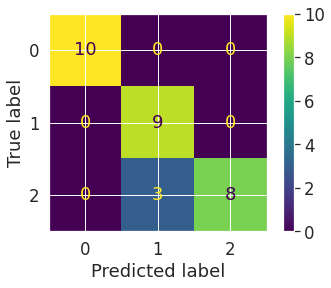

In [215]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_preds)


In [216]:
from sklearn.metrics import classification_report
target_names = ['setosa', 'versicolor', 'virginica']
print(classification_report(y_test, y_preds, target_names=target_names))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.75      1.00      0.86         9
   virginica       1.00      0.73      0.84        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.90        30
weighted avg       0.93      0.90      0.90        30



In [217]:
import pandas as pd
heart_disease = pd.read_csv('../matplotlib/heart-disease.csv')
heart_disease.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [218]:
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X.head(), y.head()
X


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [219]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

np.random.seed(42)

model = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)

model.fit(X_train, y_train)
model.score(X_test, y_test)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.6557377049180327

In [220]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

np.random.seed(42)

model = LinearSVC()

model.fit(X_train, y_train)
model.score(X_test, y_test)


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.819672131147541

In [221]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

np.random.seed(42)

model = RandomForestClassifier(n_estimators=100)

model.fit(X_train, y_train)
model.score(X_test, y_test)


0.9180327868852459

Tibit: 1. For structure data use ensemble methods 2. For unstructure data use deep learning or transfer learning


In [222]:
y_preds = model.predict(X_test)
y_preds


array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0])

In [223]:
np.array(y_test)


array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [224]:
np.mean(y_preds == y_test)


0.9180327868852459

In [225]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)


0.9180327868852459

In [226]:
model.predict_proba(X_test[:5])


array([[0.94, 0.06],
       [0.04, 0.96],
       [0.44, 0.56],
       [0.52, 0.48],
       [0.15, 0.85]])

In [227]:
model.predict(X_test[:5])


array([0, 1, 1, 0, 1])

In [228]:
X.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [229]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

np.random.seed(42)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)
clf_score = clf.score(X_test, y_test)
clf_score


0.819672131147541

In [230]:
cross_val_score(clf, X, y, cv=5)


array([0.83606557, 0.8852459 , 0.83606557, 0.8       , 0.75      ])

In [231]:
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))
clf_cross_val_score, clf_score


(0.8281420765027322, 0.819672131147541)

In [232]:
cross_val_score(clf, X, y, cv=5, scoring=None)


array([0.83606557, 0.8852459 , 0.80327869, 0.85      , 0.75      ])

In [233]:
y_probs = clf.predict_proba(X_test)
y_probs[:10]


array([[0.08, 0.92],
       [0.6 , 0.4 ],
       [0.02, 0.98],
       [0.06, 0.94],
       [0.18, 0.82],
       [0.08, 0.92],
       [0.19, 0.81],
       [0.23, 0.77],
       [0.97, 0.03],
       [0.39, 0.61]])

In [234]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]


array([0.92, 0.4 , 0.98, 0.94, 0.82, 0.92, 0.81, 0.77, 0.03, 0.61])

In [235]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

fpr, tpr, thresholds


(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.04166667, 0.04166667, 0.04166667, 0.04166667, 0.04166667,
        0.04166667, 0.08333333, 0.16666667, 0.16666667, 0.16666667,
        0.16666667, 0.29166667, 0.29166667, 0.375     , 0.375     ,
        0.41666667, 0.41666667, 0.45833333, 0.54166667, 0.66666667,
        0.75      , 0.79166667, 0.95833333, 1.        ]),
 array([0.        , 0.02702703, 0.08108108, 0.16216216, 0.21621622,
        0.32432432, 0.45945946, 0.51351351, 0.56756757, 0.62162162,
        0.72972973, 0.75675676, 0.75675676, 0.78378378, 0.83783784,
        0.86486486, 0.86486486, 0.91891892, 0.91891892, 0.97297297,
        0.97297297, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        ]),
 array([1.99, 0.99, 0.98, 0.94, 0.93, 0.92, 0.83, 0.82, 0.8 , 0.78, 0.71,
        0.69, 0.62, 0.61, 0.6 , 0.59, 0.44, 0.4 , 0.37, 0.33, 0.29, 0.26,
        0.21, 0.2 , 0.11, 0.08, 0.06, 0.03, 0.01]))

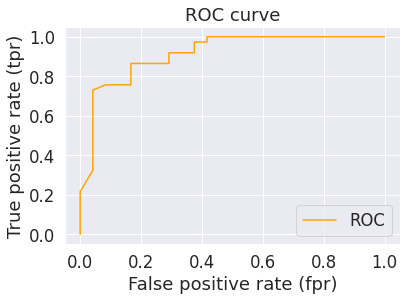

In [236]:
import matplotlib.pyplot as plt


def plot_roc_curv(fpr, tpr):

    # plot roc curve
    plt.plot(fpr, tpr, color='orange', label='ROC')

    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title('ROC curve')
    plt.legend()
    plt.show()


plot_roc_curv(fpr, tpr)


In [237]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)


0.9138513513513514

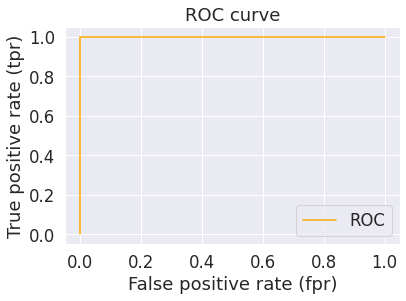

In [238]:
# plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curv(fpr, tpr)


In [239]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)


array([[18,  6],
       [ 5, 32]])

In [240]:
len(X_test), 18+6+5+32


(61, 61)

In [241]:
pd.crosstab(y_test, y_preds, rownames=[
            'Actual Labels'], colnames=['Predicted Labels'])


Predicted Labels,0,1
Actual Labels,,
0,18,6
1,5,32


<AxesSubplot:>

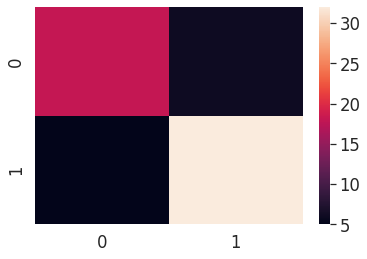

In [242]:
import seaborn as sns

sns.set(font_scale=1.5)

conf_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat)


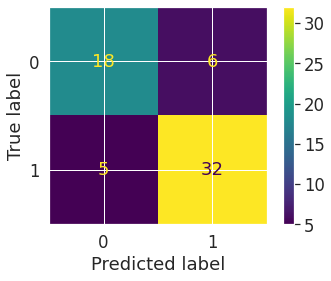

In [243]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_preds)


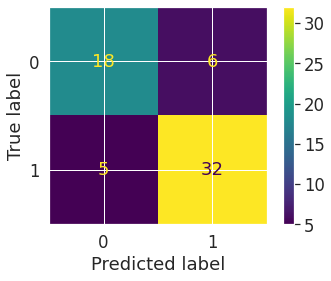

In [244]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)


In [245]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

           0       0.78      0.75      0.77        24
           1       0.84      0.86      0.85        37

    accuracy                           0.82        61
   macro avg       0.81      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



In [246]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf, X, y, cv=5, scoring='precision')


array([0.82857143, 0.93548387, 0.8125    , 0.82352941, 0.74358974])

In [247]:
cross_val_score(clf, X, y, cv=5, scoring='recall')


array([0.84848485, 0.87878788, 0.81818182, 0.84848485, 0.87878788])

In [248]:
cross_val_score(clf, X, y, cv=5, scoring='accuracy')


array([0.81967213, 0.8852459 , 0.80327869, 0.76666667, 0.78333333])

In [249]:
housing_df

X = housing_df.drop('target', axis=1)

y = housing_df['target']


In [250]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

np.random.seed(42)

model = RandomForestRegressor(n_estimators=100)

model.fit(X_train, y_train)
model.score(X_test, y_test)


0.8046210147971543

In [251]:
y_preds = model.predict(X_test)


In [252]:
y_preds[:10]


array([2.48659  , 3.7629813, 1.60536  , 2.05636  , 1.46593  , 1.55746  ,
       0.76294  , 1.67837  , 4.9616793, 0.85609  ])

In [253]:
from sklearn.metrics import r2_score

r2_score(y_test, y_preds)


0.8046210147971543

In [254]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_preds)


0.3268197570736436

In [255]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_preds)


0.26059930688042177

In [256]:
from sklearn.model_selection import cross_val_score

cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')
np.mean(cv_r2)


0.6522576238363302

In [114]:
cv_mae = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
np.mean(cv_mae)


-0.46584536036821705

In [115]:
cv_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
np.mean(cv_mse)


-0.43172589526216515

In [116]:
cv_mae


array([-0.54365232, -0.40834014, -0.44158858, -0.46199571, -0.47365005])

In [117]:
cv_mse


array([-0.52599715, -0.3471811 , -0.37280217, -0.44625493, -0.46639413])

In [118]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)
clf.score(X_test, y_test)


0.8524590163934426

In [119]:
y_pred = clf.predict(X_test)

y_pred


array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [120]:
accuracy_score(y_test, y_pred)


0.8524590163934426

In [121]:
precision_score(y_test, y_pred)


0.8484848484848485

In [122]:
recall_score(y_test, y_pred)


0.875

In [123]:
f1_score(y_test, y_pred)


0.8615384615384615

In [124]:
print('Classifier metrics on the test set')
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")


Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


In [125]:
housing_df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [126]:
from sklearn.metrics import r2_score,  mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(42)

X = housing_df.drop('target', axis=1)
y = housing_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)

model.fit(X_train, y_train)
model.score(X_test, y_test)


0.8066196804802649

In [127]:
y_pred = model.predict(X_test)
y_pred


array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [128]:
r2_score(y_test, y_pred)


0.8066196804802649

In [129]:
mean_absolute_error(y_test, y_pred)


0.3265721842781009

In [130]:
mean_squared_error(y_test, y_pred)


0.2534073069137548

In [131]:
print('Regresson metrics on the test set')
print(f"R2 score: {r2_score(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")


Regresson metrics on the test set
R2 score: 0.8066196804802649
MAE: 0.3265721842781009
MSE: 0.2534073069137548


In [132]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [133]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np


grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200], "max_depth": [None, 5, 10, 20, 30], "max_features": [
    'auto', 'sqrt'], "min_samples_split": [2, 4, 6], "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

rs_clf = RandomizedSearchCV(
    estimator=clf, param_distributions=grid, n_iter=50, cv=5, verbose=0)

rs_clf.fit(X_train, y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1), n_iter=50,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]})

In [134]:
rs_clf.best_params_

{'n_estimators': 10,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 30}

In [135]:
rs_y_preds = rs_clf.predict(X_test)

# print('Classifier metrics on the test set')
# print(f"Accuracy: {accuracy_score(y_test, rs_y_preds)*100:.2f}%")
# print(f"Precision: {precision_score(y_test, rs_y_preds)}")
# print(f"Recall: {recall_score(y_test, rs_y_preds)}")
# print(f"F1: {f1_score(y_test, rs_y_preds)}")

rs_metrics = evaluate_preds(y_test, rs_y_preds)
rs_metrics

Acc: 85.25%
Precision: 0.85
Recall: 0.88
F1 score: 0.86


{'accuracy': 0.85, 'precision': 0.85, 'recall': 0.88, 'f1': 0.86}

In [136]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np


grid_2 = {"n_estimators": [10, 100, 200], "max_depth": [20, 30], "max_features": [
    'auto', 'sqrt'], "min_samples_split": [6], "min_samples_leaf": [4]}

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

gd_clf = GridSearchCV(
    estimator=clf, param_grid=grid_2,  cv=5, verbose=0)

gd_clf.fit(X_train, y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [4], 'min_samples_split': [6],
                         'n_estimators': [10, 100, 200]})

In [137]:
gd_clf.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 200}

In [138]:
gd_y_preds = gd_clf.predict(X_test)

# print('Classifier metrics on the test set')
# print(f"Accuracy: {accuracy_score(y_test, gd_y_preds)*100:.2f}%")
# print(f"Precision: {precision_score(y_test, gd_y_preds)}")
# print(f"Recall: {recall_score(y_test, gd_y_preds)}")
# print(f"F1: {f1_score(y_test, gd_y_preds)}")

gd_metrics = evaluate_preds(y_test, gd_y_preds)
gd_metrics

Acc: 86.89%
Precision: 0.85
Recall: 0.91
F1 score: 0.88


{'accuracy': 0.87, 'precision': 0.85, 'recall': 0.91, 'f1': 0.88}

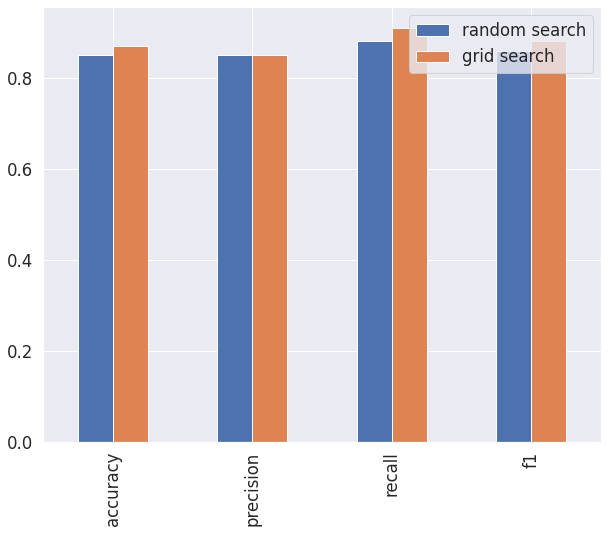

In [139]:
compare_metrics = pd.DataFrame({
                                "random search": rs_metrics,
                                "grid search": gd_metrics})
compare_metrics.plot.bar(figsize=(10, 8));

In [140]:
import pickle

pickle.dump(gd_clf, open('gridSearchCV_random_forest_model.pkl','wb'))

In [141]:
loaded_pickel_model = pickle.load(open('gridSearchCV_random_forest_model.pkl', 'rb'))

pickel_y_preds = loaded_pickel_model.predict(X_test)
evaluate_preds(y_test,pickel_y_preds)

Acc: 86.89%
Precision: 0.85
Recall: 0.91
F1 score: 0.88


{'accuracy': 0.87, 'precision': 0.85, 'recall': 0.91, 'f1': 0.88}

In [142]:
from joblib import dump, load

dump(gd_clf, filename='gridSearchCV_random_forest_model.joblib')

['gridSearchCV_random_forest_model.joblib']

In [143]:
loaded_joblib_model = load(filename='gridSearchCV_random_forest_model.joblib')

joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test,joblib_y_preds)

Acc: 86.89%
Precision: 0.85
Recall: 0.91
F1 score: 0.88


{'accuracy': 0.87, 'precision': 0.85, 'recall': 0.91, 'f1': 0.88}

In [258]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop the rows with missing labels
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipelines
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("num", numeric_transformer, numeric_features)])

# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

												# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

In [ ]:
# Using grid search with pipeline
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto", "sqrt"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

In [260]:
gs_model.score(X_test, y_test)

0.292308819012865

In [261]:
gs_model.best_params_

{'model__max_depth': 5,
 'model__max_features': 'sqrt',
 'model__min_samples_split': 2,
 'model__n_estimators': 100,
 'preprocessor__num__imputer__strategy': 'mean'}